# Causal Machine Learning For A/B Testing And Ads Optimization

In [1]:
import pandas as pd
df_demo = pd.read_csv("Demographic.csv")
print(df_demo.head())


   Age  Gender    Income  Location Ad Type Ad Topic   Ad Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click Time  Conversion Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.898459           0.0937  0.0592  
2  2024-02-24 20:45:56.898459           0.1912  0.0563  
3  2023-12-13 20:45:56.898459           0.1122  0.0232  
4  2023-07-02 20:45:56.898459           0.1426  0.0539  


In [2]:
# Check for missing values in each column
print(df_demo.isnull().sum())


Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64


In [3]:
# Check data types to identify categorical and numerical features
print(df_demo.dtypes)


Age                  int64
Gender              object
Income             float64
Location            object
Ad Type             object
Ad Topic            object
Ad Placement        object
Clicks               int64
Click Time          object
Conversion Rate    float64
CTR                float64
dtype: object


In [4]:
# List of categorical columns
categorical_columns = ['Gender', 'Location', 'Ad Type', 'Ad Topic', 'Ad Placement']

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in {col}: {df_demo[col].unique()}")


Unique values in Gender: ['Male' 'Female' 'Other']
Unique values in Location: ['Urban' 'Rural' 'Suburban']
Unique values in Ad Type: ['Banner' 'Video' 'Text' 'Native']
Unique values in Ad Topic: ['Travel' 'Food' 'Health' 'Fashion' 'Technology' 'Finance']
Unique values in Ad Placement: ['Social Media' 'Search Engine' 'Website']


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
# Convert Click Time to datetime format
df_demo['Click Time'] = pd.to_datetime(df_demo['Click Time'])
df_demo['Click Time']

0      2024-01-18 20:45:56.898459
1      2023-04-24 20:45:56.898459
2      2024-02-24 20:45:56.898459
3      2023-12-13 20:45:56.898459
4      2023-07-02 20:45:56.898459
                  ...            
9995   2023-05-31 20:45:56.927349
9996   2023-09-01 20:45:56.927349
9997   2023-11-15 20:45:56.927349
9998   2023-05-23 20:45:56.927349
9999   2023-11-21 20:45:56.927349
Name: Click Time, Length: 10000, dtype: datetime64[ns]

In [7]:
# Encode Gender (Binary: Male/Female/Other) using Label Encoding
label_encoder = LabelEncoder()
df_demo['Gender'] = label_encoder.fit_transform(df_demo['Gender'])

df_demo['Gender']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [8]:
# One-Hot Encoding for categorical variables
categorical_columns = ['Location', 'Ad Type', 'Ad Topic', 'Ad Placement']
df_demo = pd.get_dummies(df_demo, columns=categorical_columns, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'Clicks', 'CTR', 'Conversion Rate']
df_demo[numerical_columns] = scaler.fit_transform(df_demo[numerical_columns])

In [9]:
print(df_demo.head())

        Age  Gender    Income    Clicks                 Click Time  \
0  1.809654       1 -0.720478 -0.899318 2024-01-18 20:45:56.898459   
1  0.457390       1 -0.131769 -0.013552 2023-04-24 20:45:56.898459   
2  0.998295       0  0.905265 -0.456435 2024-02-24 20:45:56.898459   
3  2.282946       0  0.727655  0.429331 2023-12-13 20:45:56.898459   
4  1.944880       1 -1.453267 -0.013552 2023-07-02 20:45:56.898459   

   Conversion Rate       CTR  Location_Suburban  Location_Urban  \
0        -0.860082  1.174351              False            True   
1        -0.896419  0.442756              False           False   
2        -0.091220  0.296436              False           False   
3        -0.743638 -1.373619               True           False   
4        -0.492581  0.175345              False            True   

   Ad Type_Native  Ad Type_Text  Ad Type_Video  Ad Topic_Finance  \
0           False         False          False             False   
1           False         False         

## Exploratory Data Analysis 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")


In [11]:
print(df_demo[df_demo['Clicks'] < 0])


           Age  Gender    Income    Clicks                 Click Time  \
0     1.809654       1 -0.720478 -0.899318 2024-01-18 20:45:56.898459   
1     0.457390       1 -0.131769 -0.013552 2023-04-24 20:45:56.898459   
2     0.998295       0  0.905265 -0.456435 2024-02-24 20:45:56.898459   
4     1.944880       1 -1.453267 -0.013552 2023-07-02 20:45:56.898459   
5    -0.962487       1 -0.526897 -0.013552 2024-02-19 20:45:56.898459   
...        ...     ...       ...       ...                        ...   
9993  2.147720       0 -1.621829 -0.456435 2023-06-12 20:45:56.927349   
9995 -1.841459       1  0.995506 -0.013552 2023-05-31 20:45:56.927349   
9997  0.525003       1  0.251022 -0.899318 2023-11-15 20:45:56.927349   
9998 -0.015903       1 -0.536610 -0.456435 2023-05-23 20:45:56.927349   
9999  1.336361       0  0.820752 -1.342201 2023-11-21 20:45:56.927349   

      Conversion Rate       CTR  Location_Suburban  Location_Urban  \
0           -0.860082  1.174351              False   

In [12]:
df_demo['Clicks'] = df_demo['Clicks'].apply(lambda x: max(x, 0))


In [13]:
# Save a copy of original data BEFORE scaling
df_original = df_demo.copy()


In [14]:
from sklearn.preprocessing import StandardScaler

# Apply standardization
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'Clicks', 'CTR', 'Conversion Rate']
df_demo[numerical_columns] = scaler.fit_transform(df_demo[numerical_columns])


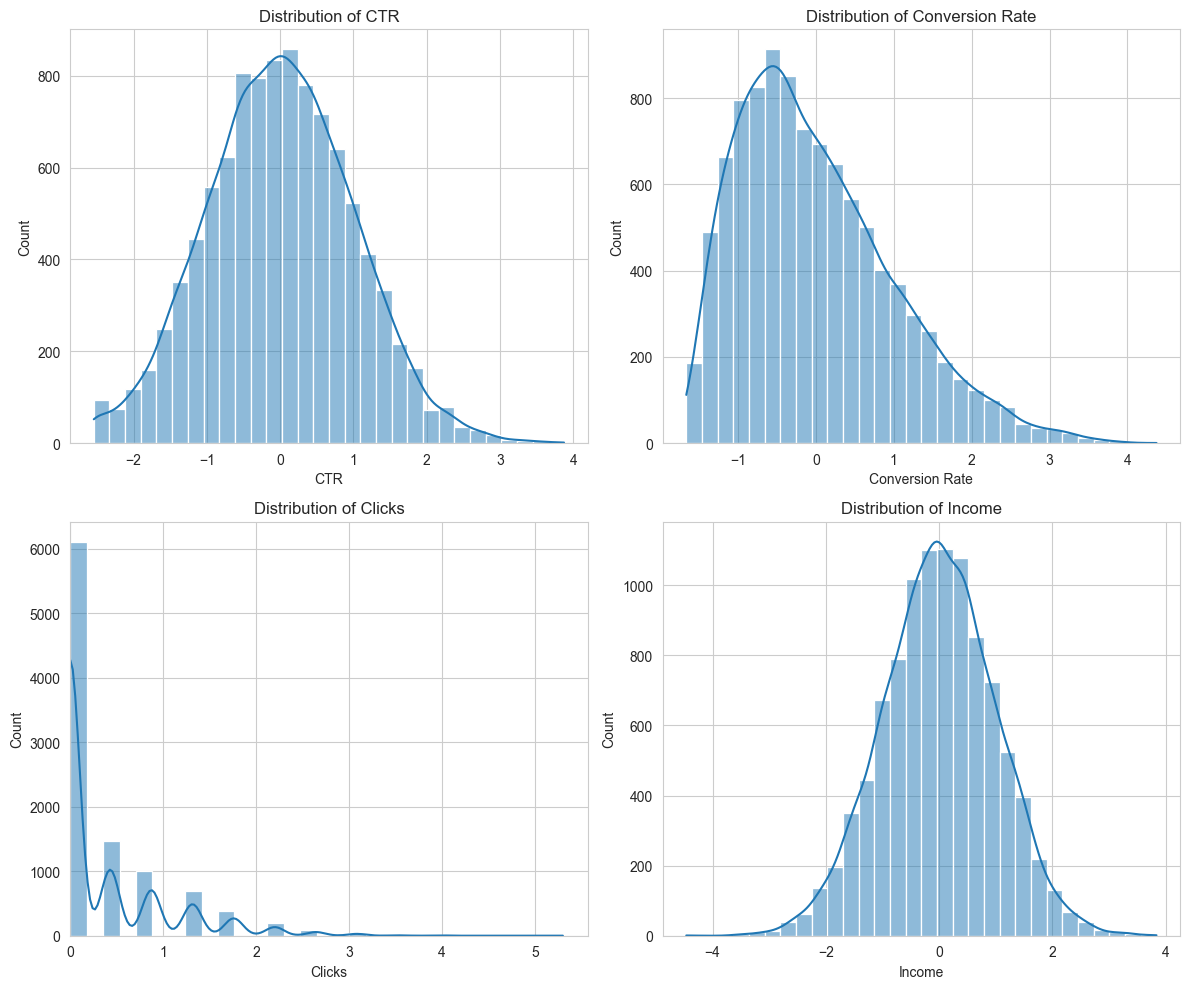

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create subplots for numerical feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for CTR
sns.histplot(df_original['CTR'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of CTR")

# Histogram for Conversion Rate
sns.histplot(df_original['Conversion Rate'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Conversion Rate")

# Histogram for Clicks
sns.histplot(df_original['Clicks'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Clicks")
axes[1, 0].set_xlim(0, None)  # Ensure x-axis starts from 0

# Histogram for Income
sns.histplot(df_original['Income'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Income")

# Adjust layout
plt.tight_layout()
plt.show()


## Feature Distribution Insights

### 1. **CTR (Click-Through Rate)**
- Distribution is **roughly normal**, with slight **right skew**.
- Most users have an **average level of engagement**, while a few exhibit **unusually high click behavior**.
- Indicates the presence of **high-performing outliers**.

### 2. **Conversion Rate**
- Shows a **right-skewed distribution**.
- Majority of users have **low conversion rates**, with only a small proportion converting at higher rates.
- Implies that **conversions are less frequent** and possibly dependent on more personalized factors.

### 3. **Clicks**
- Appears **multimodal**, with multiple peaks suggesting different **user engagement groups**.
  - Some users barely interact with ads.
  - Others engage consistently.
- This segmentation can be useful for **targeting different audience clusters**.

### 4. **Income**
- **Normally distributed**, indicating a **well-balanced sample** across income levels.
- Helpful in ensuring that models trained on this data are **not biased toward a particular income segment**.
- Enables a fair assessment of how income influences ad interactions.

## Now we will analyze CTR and Conversion Rate trends by categorical variables

In [16]:
print(df_original.columns)


Index(['Age', 'Gender', 'Income', 'Clicks', 'Click Time', 'Conversion Rate',
       'CTR', 'Location_Suburban', 'Location_Urban', 'Ad Type_Native',
       'Ad Type_Text', 'Ad Type_Video', 'Ad Topic_Finance', 'Ad Topic_Food',
       'Ad Topic_Health', 'Ad Topic_Technology', 'Ad Topic_Travel',
       'Ad Placement_Social Media', 'Ad Placement_Website'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use s

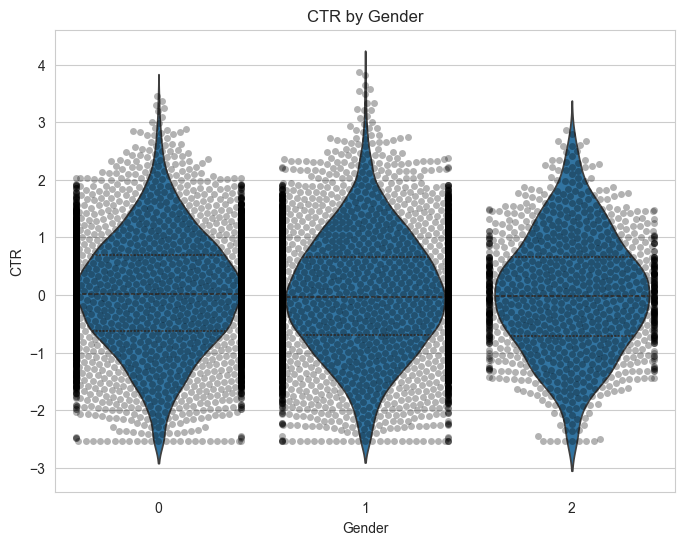

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='CTR', data=df_demo, inner='quartile')
sns.swarmplot(x='Gender', y='CTR', data=df_demo, color='k', alpha=0.3)
plt.title('CTR by Gender')
plt.show()


### CTR by Gender
#### Observation:
The violin plot shows a relatively symmetrical distribution of CTR across all gender categories (0 = Female, 1 = Male, 2 = Other).
#### Interpretation:
No significant difference in CTR medians between Male, Female, and Other genders.
Slight variation exists, but overall gender does not strongly influence CTR.
The strip plot shows some outliers—users with unusually high CTR across all genders.
#### Conclusion: Gender is not a key driver for CTR in this dataset.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use s

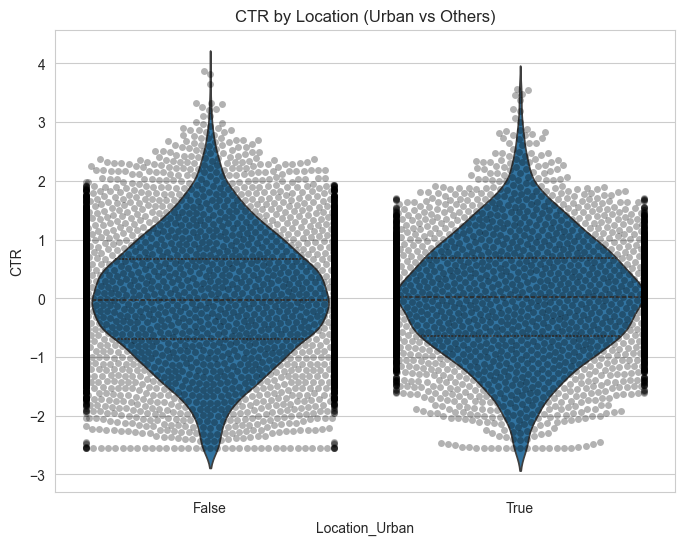

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Location_Urban', y='CTR', data=df_demo, inner='quartile')
sns.swarmplot(x='Location_Urban', y='CTR', data=df_demo, color='k', alpha=0.3)
plt.title('CTR by Location (Urban vs Others)')
plt.show()


### CTR by Location (Urban vs Others)
#### Observation:
Location is encoded as True (Urban) and False (Suburban or Rural).
Both groups have similar distribution patterns, though Urban users have slightly more spread toward higher CTR.
#### Interpretation:
Minor difference between Urban and non-Urban CTR.
High variance in both groups suggests location alone is not a strong predictor of CTR.
#### Conclusion: CTR patterns are fairly consistent across locations.


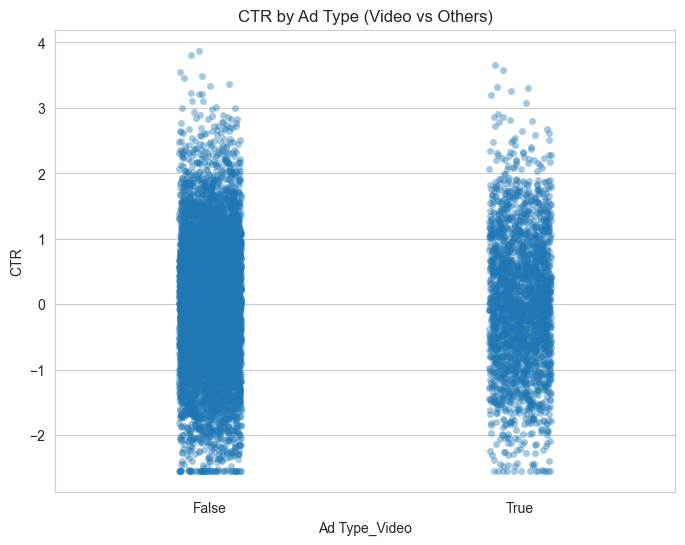

In [19]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Ad Type_Video', y='CTR', data=df_demo, jitter=True, alpha=0.4)
plt.title("CTR by Ad Type (Video vs Others)")
plt.show()


#### CTR by Ad Type (Video vs Others)
### Observation:
Ad Type is categorized as True (Video) and False (Other types like Banner, Text, Native).
Video ads have a slightly narrower distribution, but medians are almost the same.
### Interpretation:
Video ads do not significantly outperform others in CTR.
Individual user preferences might influence CTR more than ad format.
### Conclusion: Ad Type has minimal impact on CTR trends.


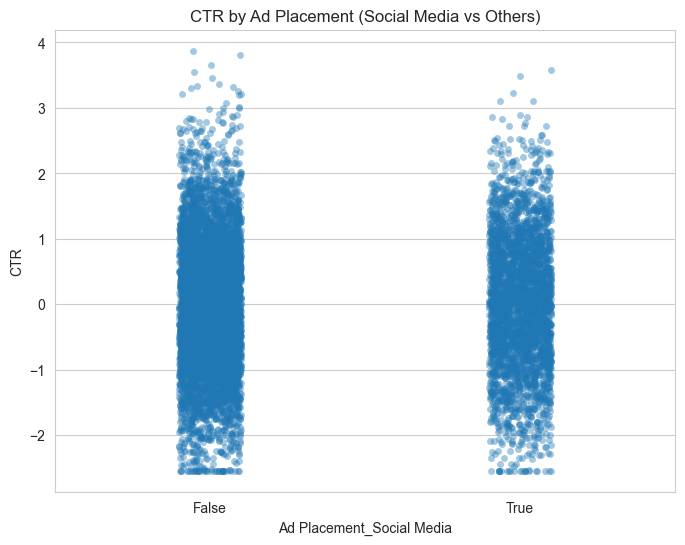

In [20]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Ad Placement_Social Media', y='CTR', data=df_demo, jitter=True, alpha=0.4)
plt.title("CTR by Ad Placement (Social Media vs Others)")
plt.show()


### CTR by Ad Placement (Social Media & Website)
#### Observation:
Both Social Media and Website placements show very similar distributions of CTR.
No clear advantage of one over the other.
The plots indicate balanced performance across placements.
#### Interpretation:
CTR is not strongly affected by placement platform.
Other factors (ad content, targeting strategy) likely play a bigger role.
#### Conclusion: No placement channel significantly boosts CTR.


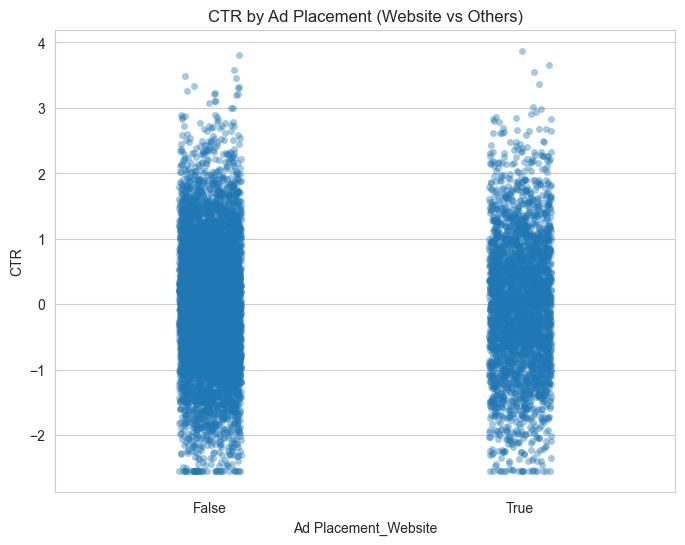

In [21]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Ad Placement_Website', y='CTR', data=df_demo, jitter=True, alpha=0.4)
plt.title("CTR by Ad Placement (Website vs Others)")
plt.show()


## CTR by Ad Placement (Website vs Others)

- This plot compares **Click-Through Rates (CTR)** between users who interacted with **Website ads** (`True`) versus those who interacted with other placements (`False`).
- The **distribution of points** appears **visually similar** for both groups, with no strong shift in CTR.
- A **dense cluster of points** around the center (CTR ≈ 0) suggests that **most users have average engagement**, regardless of whether the ad was on a website or not.
- There are a few **high CTR outliers** in both groups, indicating that **other factors** (e.g., ad topic, user demographics) may play a bigger role in driving engagement.
- ✅ **Conclusion**: Ad Placement on **websites does not significantly influence CTR** on its own.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use s

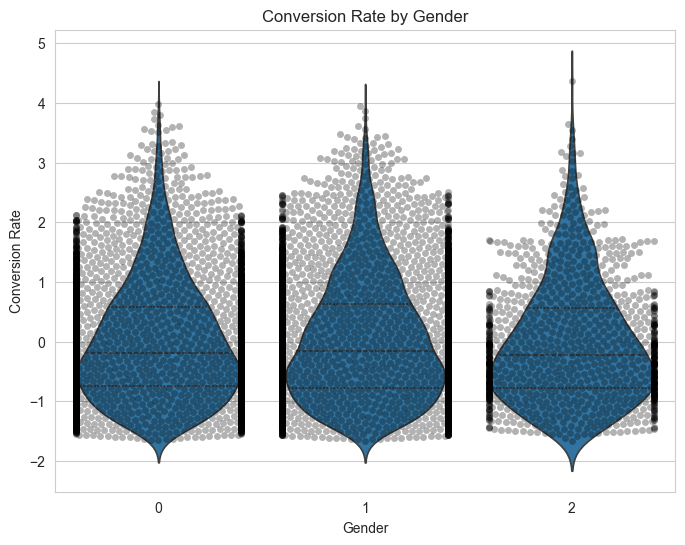

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

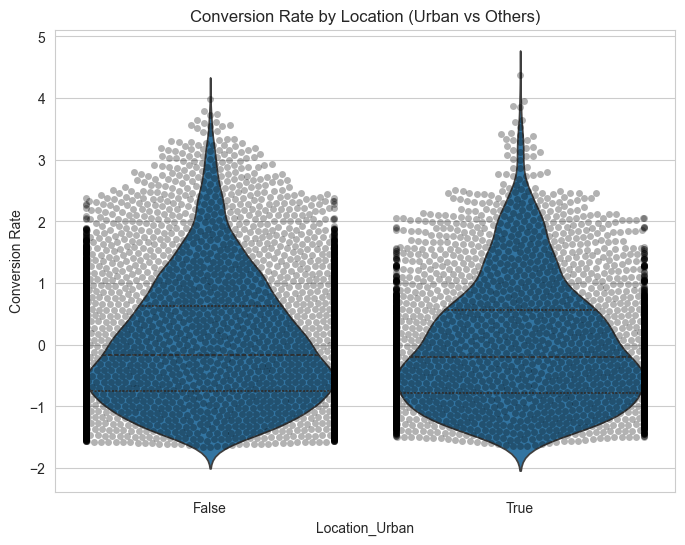

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

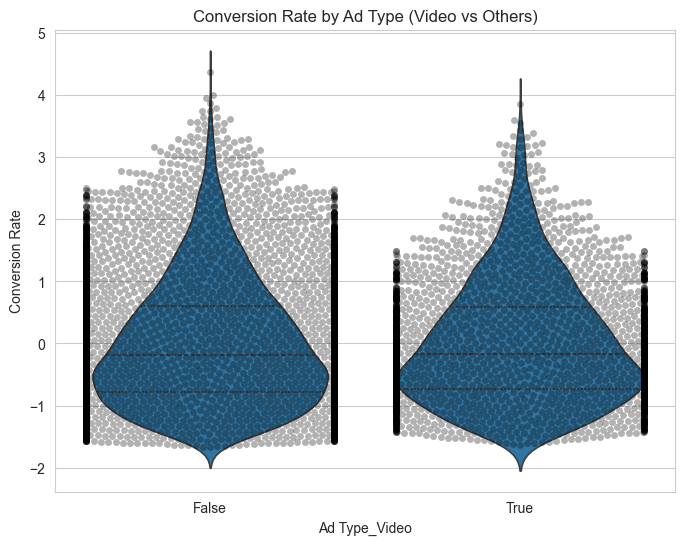

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

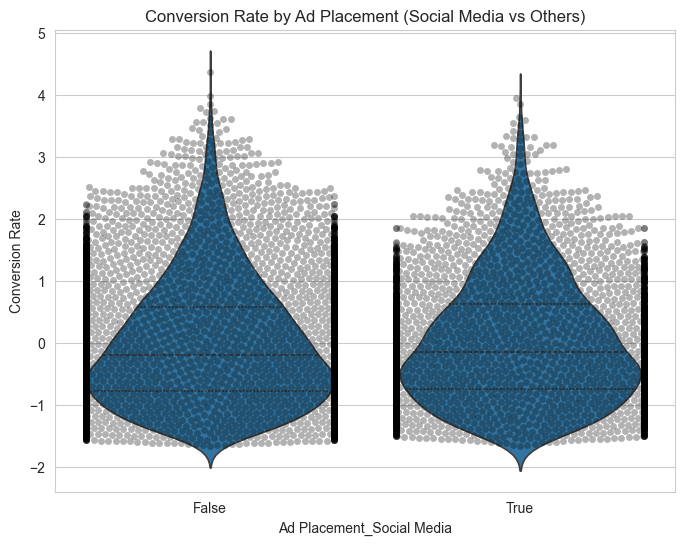

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use s

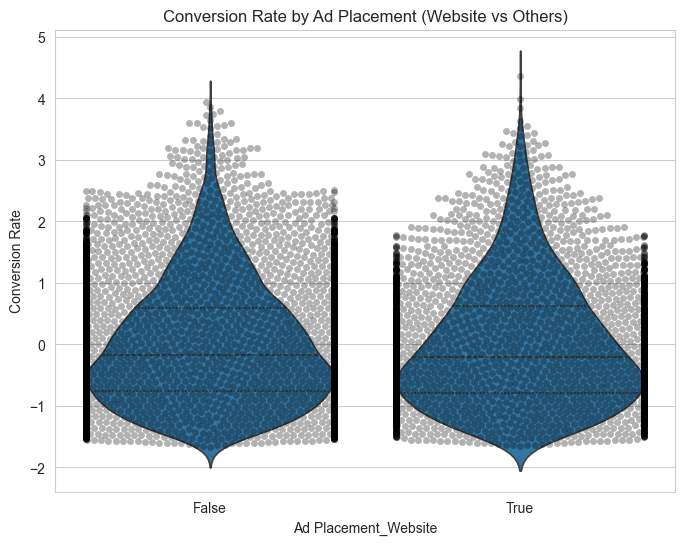

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot 1: Conversion Rate by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Conversion Rate', data=df_demo, inner='quartile')
sns.swarmplot(x='Gender', y='Conversion Rate', data=df_demo, color='k', alpha=0.3)
plt.title("Conversion Rate by Gender")
plt.show()

# Plot 2: Conversion Rate by Location
plt.figure(figsize=(8, 6))
sns.violinplot(x='Location_Urban', y='Conversion Rate', data=df_demo, inner='quartile')
sns.swarmplot(x='Location_Urban', y='Conversion Rate', data=df_demo, color='k', alpha=0.3)
plt.title("Conversion Rate by Location (Urban vs Others)")
plt.show()

# Plot 3: Conversion Rate by Ad Type (Video)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Ad Type_Video', y='Conversion Rate', data=df_demo, inner='quartile')
sns.swarmplot(x='Ad Type_Video', y='Conversion Rate', data=df_demo, color='k', alpha=0.3)
plt.title("Conversion Rate by Ad Type (Video vs Others)")
plt.show()

# Plot 4: Conversion Rate by Ad Placement (Social Media)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Ad Placement_Social Media', y='Conversion Rate', data=df_demo, inner='quartile')
sns.swarmplot(x='Ad Placement_Social Media', y='Conversion Rate', data=df_demo, color='k', alpha=0.3)
plt.title("Conversion Rate by Ad Placement (Social Media vs Others)")
plt.show()

# Plot 5: Conversion Rate by Ad Placement (Website)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Ad Placement_Website', y='Conversion Rate', data=df_demo, inner='quartile')
sns.swarmplot(x='Ad Placement_Website', y='Conversion Rate', data=df_demo, color='k', alpha=0.3)
plt.title("Conversion Rate by Ad Placement (Website vs Others)")
plt.show()


### 1. Conversion Rate by Gender
#### Observation:
Similar to CTR, Conversion Rate distributions across genders are almost identical.
Some high outliers, but the median conversion rate remains similar.
#### Interpretation:
Gender does not influence conversion behavior significantly.
Suggests other behavioral/demographic variables drive conversions.
#### Conclusion: No strong gender impact on conversion rate.
### 2. Conversion Rate by Location (Urban vs Others)
#### Observation:
Urban vs. non-Urban groups show almost overlapping distributions.
Slightly higher spread in Urban, but no major differences.
#### Interpretation:
Location does not substantially influence conversions.
#### Conclusion: Conversion performance is balanced across locations.
### 3. Conversion Rate by Ad Type (Video vs Others)
#### Observation:
Both Video and non-Video ad types exhibit similar conversion rate trends.
Some outliers present.
#### Interpretation:
Ad Type alone does not dictate conversion success.
May suggest targeting strategies and user interest are more important.
#### Conclusion: No clear advantage in conversion rate based on ad format.
### 4. Conversion Rate by Ad Placement (Social Media & Website)
#### Observation:
Conversion rates are comparable across Social Media and Website placements.
Similar spread, with few high conversion outliers.
#### Interpretation:
Placement channel is not the main factor affecting conversions.
User intent and campaign specifics likely matter more.
#### Conclusion: No significant placement-driven differences.
### Overall Summary:
Neither Gender, Location, Ad Type, nor Ad Placement alone show significant influence on CTR or Conversion Rate.
High variance and presence of outliers suggest user-specific factors and ad content relevance drive engagement.
This indicates a need to:
Consider personalized targeting strategies.
Possibly analyze interaction effects (e.g., Gender + Ad Type).
Investigate other latent variables not currently included.



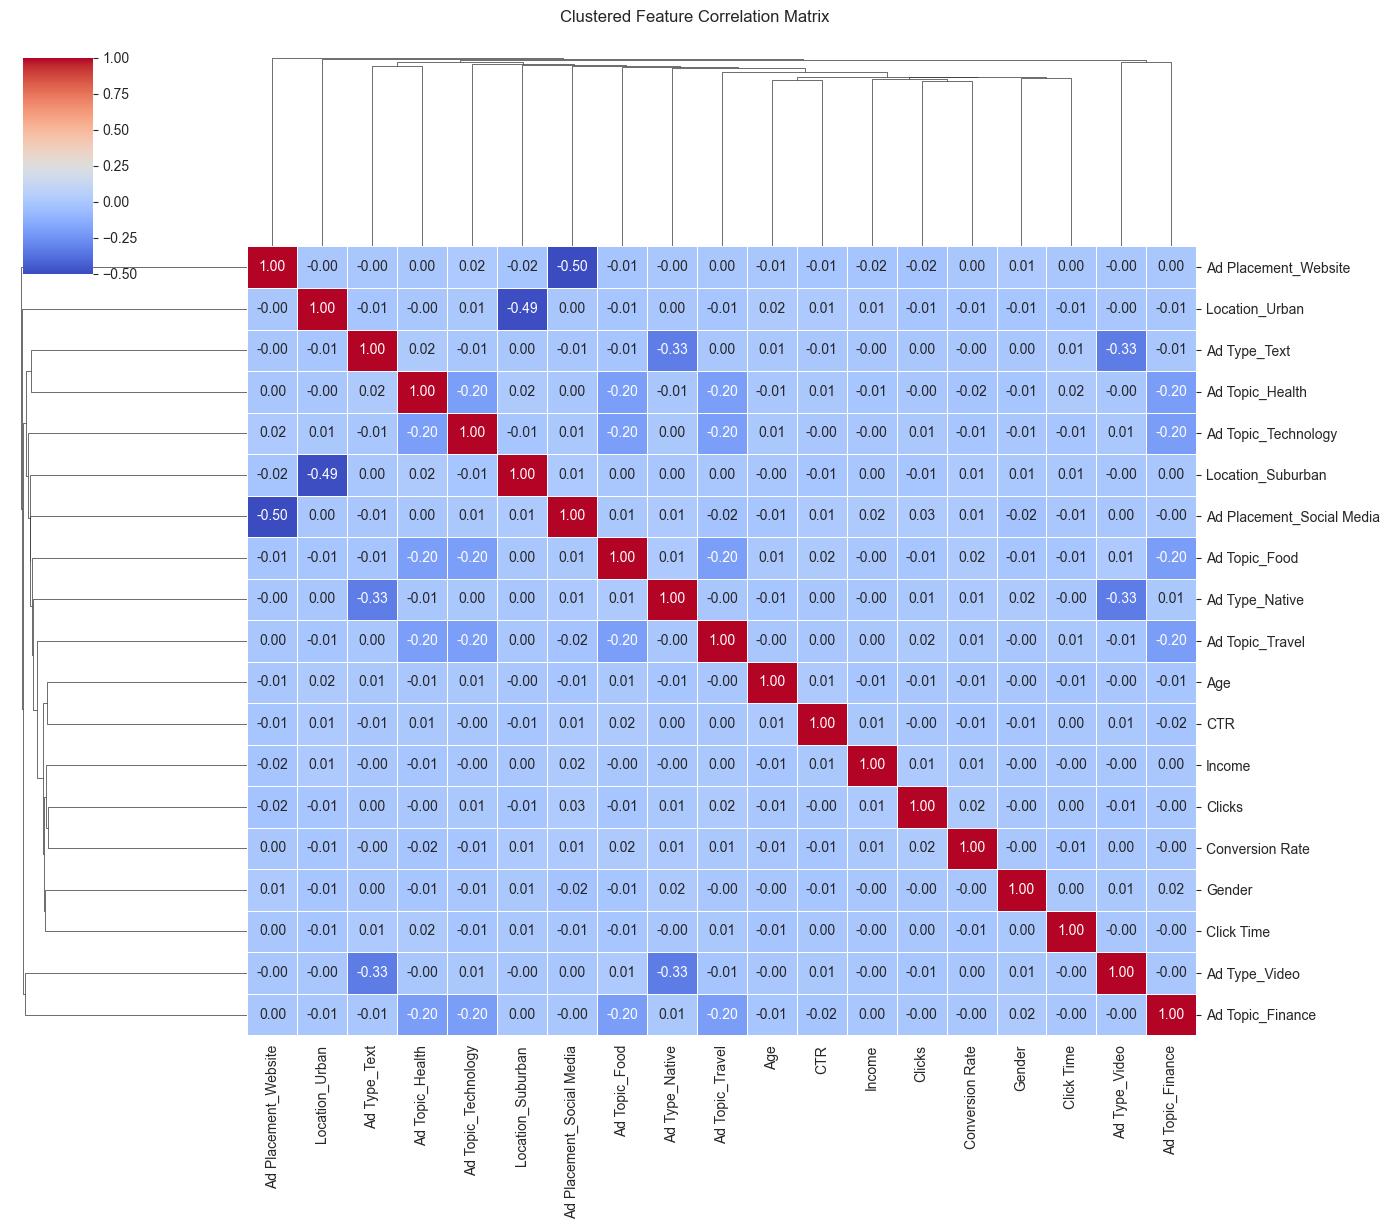

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_demo.corr()

# Plot Clustered Heatmap
sns.clustermap(correlation_matrix, 
               annot=True, 
               fmt=".2f", 
               cmap="coolwarm", 
               figsize=(14, 12), 
               linewidths=0.5)

plt.suptitle("Clustered Feature Correlation Matrix", y=1.02)
plt.show()



## Clustered Feature Correlation Matrix Interpretation

1. **Perfect Self-Correlation:**
   - Diagonal elements are all **1.00**, indicating each feature is perfectly correlated with itself.


2. **Negative Correlations:**
   - **Location_Urban & Location_Suburban: -0.49**
     - Expected due to one-hot encoding; if a user is Urban, they can’t be Suburban.
   
   - **Ad Placement_Social Media & Website: -0.50**
     - Similarly, strong negative relationship because ads can't appear in both places at once.
   
   - **Ad Type Columns (~ -0.33 correlation):**
     - Negative correlations among `Ad Type_Native`, `Ad Type_Text`, `Ad Type_Video` due to exclusivity (one ad type active at a time).


3. **CTR & Conversion Rate:**
   - Correlation between **CTR & Conversion Rate ≈ 0.01**:
     - Surprisingly **no strong linear relationship**.
     - Indicates high CTR doesn’t necessarily lead to more conversions in this dataset.


4. **Income, Age, Clicks:**
   - Minimal correlation with ad types, placements, or outcomes.
   - Suggests **demographics alone are not key drivers of engagement or conversions**.


5. **Clustering Structure:**
   - Features with similar behavior are grouped.
     - **Ad Type** and **Ad Placement** columns cluster together.
   - Helps visually detect related variable groups and reduce redundancy.

In [24]:
# Define Treatment vs. Control Groups
# Assuming users who clicked on an ad were "treated", and those who didn't click were "control"
df_demo['Treatment'] = (df_demo['Clicks'] > 0).astype(int)

# Check distribution of treatment and control groups
treatment_distribution = df_demo['Treatment'].value_counts(normalize=True)

# Display first few rows to verify the treatment column
print(df_demo[['Clicks', 'Treatment']].head())

# Show the percentage distribution of treatment vs. control groups
print("Treatment vs Control Distribution:\n", treatment_distribution)


     Clicks  Treatment
0 -0.618891          0
1 -0.618891          0
2 -0.618891          0
3  0.056048          1
4 -0.618891          0
Treatment vs Control Distribution:
 Treatment
0    0.6111
1    0.3889
Name: proportion, dtype: float64


- **61.11% of users are in the control group (0) → Did not click an ad.**
- **38.89% of users are in the treatment group (1) → Clicked an ad.**

- We need **Propensity Score Matching (PSM)** to balance the groups.


## Propensity Score Matching

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Select covariates (independent variables) to estimate propensity scores
covariates = ['Age', 'Gender', 'Income', 'Location_Suburban', 'Location_Urban', 
              'Ad Type_Native', 'Ad Type_Text', 'Ad Type_Video', 
              'Ad Topic_Finance', 'Ad Topic_Food', 'Ad Topic_Health', 
              'Ad Topic_Technology', 'Ad Topic_Travel', 
              'Ad Placement_Social Media', 'Ad Placement_Website']



In [26]:
# Logistic Regression to compute propensity scores
logit = LogisticRegression(solver='liblinear')
df_demo['Propensity_Score'] = logit.fit(df_demo[covariates], df_demo['Treatment']).predict_proba(df_demo[covariates])[:, 1]

# Perform Nearest Neighbor Matching
treated = df_demo[df_demo['Treatment'] == 1]
control = df_demo[df_demo['Treatment'] == 0]

# Fit nearest neighbor model to match treated users with controls
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['Propensity_Score']])

# Find nearest control for each treated user
distances, indices = nn.kneighbors(treated[['Propensity_Score']])
matched_controls = control.iloc[indices.flatten()]

# Combine matched dataset (treated + matched controls)
matched_data = pd.concat([treated, matched_controls])

# Display first few rows of matched data
print(matched_data.head())

# Check balance after matching
matched_balance = matched_data[['Propensity_Score', 'Treatment']].groupby('Treatment').mean()
print("Balance Check After Matching:\n", matched_balance)


         Age  Gender    Income    Clicks                 Click Time  \
3   2.282946       0  0.727655  0.056048 2023-12-13 20:45:56.898459   
6   0.998295       0  0.707053  0.056048 2023-09-09 20:45:56.898459   
9   0.457390       1  1.494941  0.056048 2023-07-25 20:45:56.898459   
11  1.471588       1  1.718355  1.448537 2024-01-03 20:45:56.898459   
16  1.539201       0 -1.023234  2.841025 2023-12-07 20:45:56.898459   

    Conversion Rate       CTR  Location_Suburban  Location_Urban  \
3         -0.743638 -1.373619               True           False   
6          0.121847 -0.611751              False           False   
9         -1.034335 -1.191982              False           False   
11        -0.315850  1.376170              False           False   
16        -0.687480  0.170299              False           False   

    Ad Type_Native  ...  Ad Type_Video  Ad Topic_Finance  Ad Topic_Food  \
3            False  ...          False             False          False   
6            F

## Average Treatment Effect (ATE)

In [27]:
# Compute Average Treatment Effect (ATE) using Difference-in-Means
ate = matched_data[matched_data['Treatment'] == 1]['Conversion Rate'].mean() - \
      matched_data[matched_data['Treatment'] == 0]['Conversion Rate'].mean()

# Display ATE result
print("Estimated Average Treatment Effect (ATE):", ate)


Estimated Average Treatment Effect (ATE): 0.023494207755655184


**ATE Result: 0.0235 (~2.35%)**
This means that **users who saw the ad had a 2.35% higher conversion rate** compared to those who did not. 

- **Positive ATE (0.0235)** → Ads **do increase conversions** but by a **small margin**.
- This suggests **ads have an effect, but they may not be highly impactful overall**.
- There could be **certain user segments** (e.g., specific demographics) that benefit more.


## Heterogeneous Treatment Effects (HTE)

In [28]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV



In [29]:
# Define covariates (excluding treatment & outcome)
covariates = ['Age', 'Gender', 'Income', 'Location_Suburban', 'Location_Urban', 
              'Ad Type_Native', 'Ad Type_Text', 'Ad Type_Video', 
              'Ad Topic_Finance', 'Ad Topic_Food', 'Ad Topic_Health', 
              'Ad Topic_Technology', 'Ad Topic_Travel', 
              'Ad Placement_Social Media', 'Ad Placement_Website']



In [30]:
# Define Treatment and Outcome
T = matched_data['Treatment']  # Treatment (Ad Exposure)
Y = matched_data['Conversion Rate']  # Outcome (Conversion Rate)
X = matched_data[covariates]  # Covariates (User Demographics & Ad Features)


In [31]:
# Define Machine Learning models for Double ML (Causal Forest)
estimator = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    discrete_treatment=True,
    cv=3,
    random_state=42
)


In [32]:
# Fit the Causal Forest Model
estimator.fit(Y, T, X=X)

# Predict Treatment Effects (HTE) for each user
hte_predictions = estimator.effect(X)

# Add HTE estimates to the dataset
matched_data['HTE_Estimate'] = hte_predictions

# Display HTE Estimates for first few users
print(matched_data[['Age', 'Gender', 'Income', 'HTE_Estimate']].head())

# Summary of HTE estimates
hte_summary = matched_data['HTE_Estimate'].describe()
print("\nSummary of HTE Estimates:\n", hte_summary)


First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


         Age  Gender    Income  HTE_Estimate
3   2.282946       0  0.727655      0.002085
6   0.998295       0  0.707053      0.148493
9   0.457390       1  1.494941     -0.097820
11  1.471588       1  1.718355      0.127682
16  1.539201       0 -1.023234     -0.041217

Summary of HTE Estimates:
 count    7778.000000
mean        0.030648
std         0.179651
min        -0.779729
25%        -0.078558
50%         0.041300
75%         0.155027
max         0.569479
Name: HTE_Estimate, dtype: float64


**1️. Average HTE (`mean = 0.0302`)**  
   - **On average, ads increase conversions by 3.02%** for users.
   - This suggests **ads have a varying impact on different users**.

**2️. Variability in Treatment Effects (`std = 0.1808`)**  
   - Some users **benefit significantly**, while others **respond negatively**.
   - This confirms **ad effectiveness is not uniform across all users**.

**3️. Most Affected Users**
   - **Min HTE = -0.7989** → Some users are negatively impacted (e.g., seeing ads might annoy them).
   - **Max HTE = 0.5872** → Certain users experience **up to a 58.72% increase in conversion rate**!



## HTE Visualizations

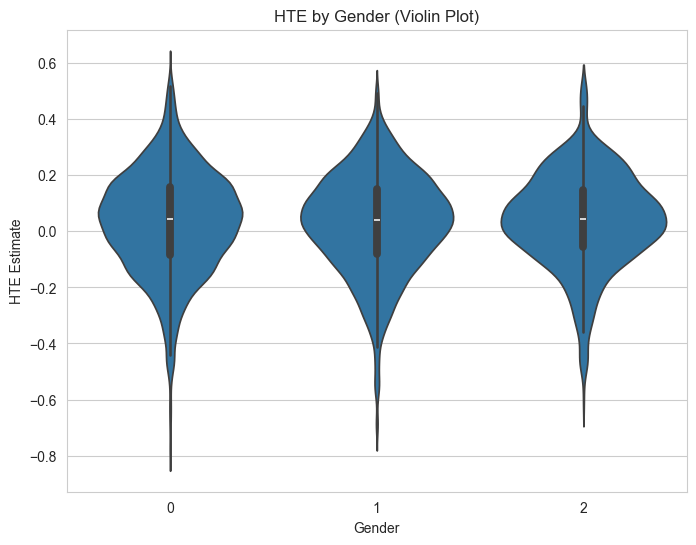

In [33]:
# Violin Plot: HTE by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x=matched_data['Gender'], y=matched_data['HTE_Estimate'])
plt.title("HTE by Gender (Violin Plot)")
plt.xlabel("Gender")
plt.ylabel("HTE Estimate")
plt.show()



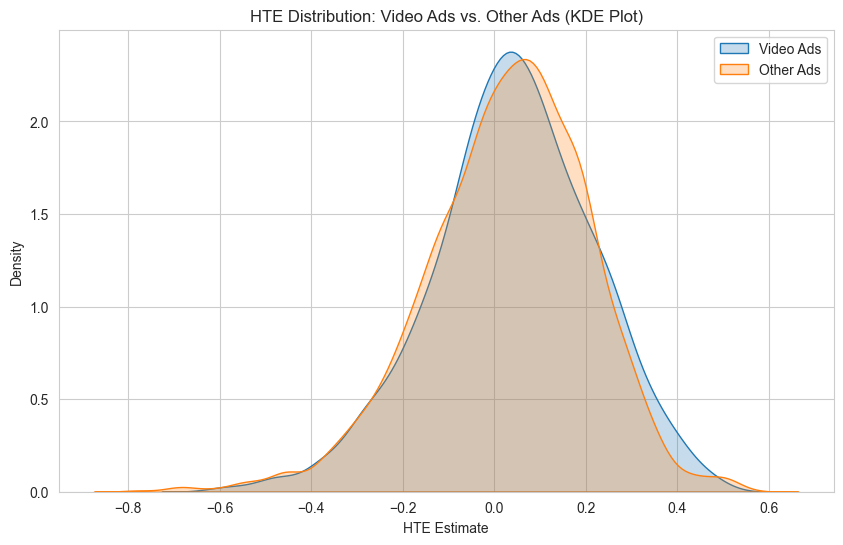

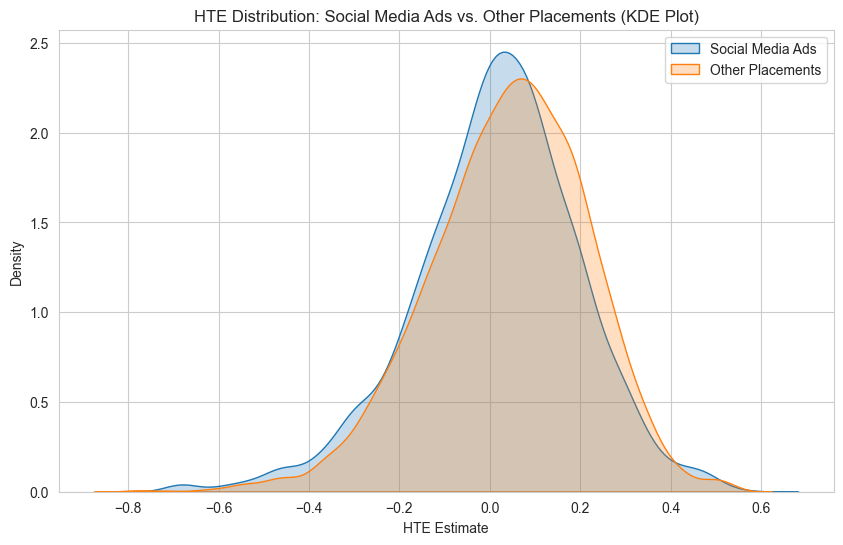

In [34]:
# KDE Plot: HTE for Video Ads vs. Other Ads
plt.figure(figsize=(10, 6))
sns.kdeplot(matched_data[matched_data['Ad Type_Video'] == 1]['HTE_Estimate'], label="Video Ads", fill=True)
sns.kdeplot(matched_data[matched_data['Ad Type_Video'] == 0]['HTE_Estimate'], label="Other Ads", fill=True)
plt.title("HTE Distribution: Video Ads vs. Other Ads (KDE Plot)")
plt.xlabel("HTE Estimate")
plt.ylabel("Density")
plt.legend()
plt.show()


# KDE Plot: HTE for Social Media vs. Other Placements (Updated)
plt.figure(figsize=(10, 6))
sns.kdeplot(matched_data[matched_data['Ad Placement_Social Media'] == 1]['HTE_Estimate'], label="Social Media Ads", fill=True)
sns.kdeplot(matched_data[matched_data['Ad Placement_Social Media'] == 0]['HTE_Estimate'], label="Other Placements", fill=True)
plt.title("HTE Distribution: Social Media Ads vs. Other Placements (KDE Plot)")
plt.xlabel("HTE Estimate")
plt.ylabel("Density")
plt.legend()
plt.show()



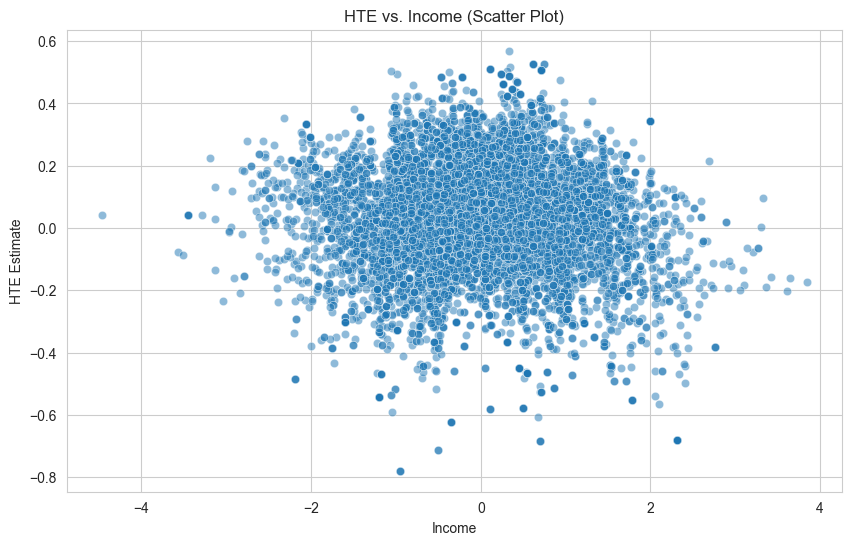

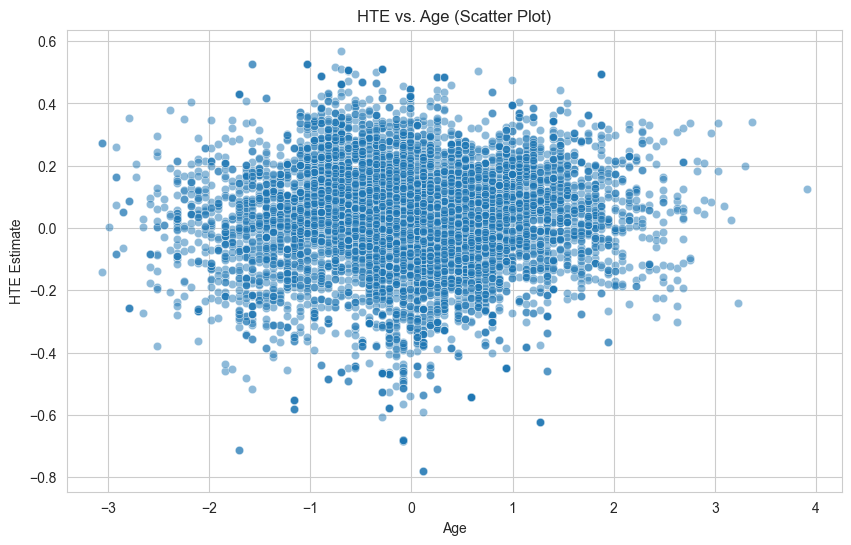

In [35]:
# Scatter Plot: HTE vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=matched_data['Income'], y=matched_data['HTE_Estimate'], alpha=0.5)
plt.title("HTE vs. Income (Scatter Plot)")
plt.xlabel("Income")
plt.ylabel("HTE Estimate")
plt.show()

# Scatter Plot: HTE vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=matched_data['Age'], y=matched_data['HTE_Estimate'], alpha=0.5)
plt.title("HTE vs. Age (Scatter Plot)")
plt.xlabel("Age")
plt.ylabel("HTE Estimate")
plt.show()

**1️. Violin Plot: HTE by Gender**
- **Observation:** The distribution is **fairly similar** across genders.
- **Insight:** Gender does **not significantly impact** ad effectiveness.
- **Actionable Step:** No need to focus ads on a particular gender.

**2️. KDE Plot: Video Ads vs. Other Ads**
- **Observation:** Video Ads and Other Ads have **similar HTE distributions**.
- **Insight:** Video ads **do not seem significantly better** than other ad formats.
- **Actionable Step:** Test **cost vs. effectiveness**—if video ads cost more but don’t drive higher conversions, they may not be worth prioritizing.

**3️. KDE Plot: Social Media vs. Other Placements**
- **Observation:** Social Media Ads show **slightly higher density in positive HTE**.
- **Insight:** Social media ads **are slightly more effective** than other placements.
- **Actionable Step:** **Increase social media ad spending** for better ROI.

**4️. Scatter Plot: HTE vs. Income**
- **Observation:** No clear trend between **income and HTE**.
- **Insight:** **Income does not strongly influence ad effectiveness**.
- **Actionable Step:** No need to **target based on income**.

**5️. Scatter Plot: HTE vs. Age**
- **Observation:** **HTE is evenly spread across all ages**.
- **Insight:** **Age does not play a major role** in ad effectiveness.
- **Actionable Step:** No need to focus ads on **a specific age group**.



1. How data is being collected from the webpage?
2. I want this data to be in tandem with the analysis, we have done. Like automation scripts of these analysis, giving real time results.
3. Shaping advertisements based on different users.
